# Capstone Project NLP 🎥 **Netflix Review Analyzer Classification** 🎥
---

Mentor : Ahmad Hasbi Salimi <br>

**Muhamad Rafigo Weldy** | Universitas Mercu Buana | Teknik Informatika




# 🖊 Capstone Custom

## 🚨 Problem statement
> Netflix adalah salah satu platform streaming paling populer di dunia. Ulasan pengguna sangat penting untuk ** memahami kepuasan dan masalah yang dihadapi oleh pengguna**. Akan tetapi **tidak semua pengguna cukup bijak.**

## 👩🏻‍💻 Implemantasi NLP
> Maka dari itu untuk membantu pengguna dalam mengaplikasikan literasi media, kami membuat analisis ini bertujuan untuk mengklasifikasikan sentimen ulasan pengguna aplikasi Netflix menggunakan teknik NLP(Natural Language Processing).

## 🎯 Target
> Tujuan dari penggunaan sistem NLP ini adalah untuk menganalisis dan mengklasifikasikan sentimen ulasan pengguna Netflix. **Targetnya adalah** membuat sistem NLP yang tingkat keakuratannya paling tidak 90% yang akan diukur dengan metrik-metrik seperti *Akurasi, Presisi, Recall dan F1-Score*

Dengan adanya sistem ini, diharapkan dapat memberikan wawasan yang berharga bagi perusahaan untuk dapat meningkatkan layanan aplikasi Netflix, meningkatkan kepuasan pelanggan, dan mempertahankan pangsa pasar mereka dalam industri streaming video.





In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.1 MB/s eta 0:00:00


# 📚 Import Libraries

In [ ]:
# manipulasi ddata
import numpy as np
import pandas as pd

# Text processing and NLP
import nltk #untuk bekerja dengan teks dalam bahasa alami
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#ResourceNLP Model
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Gensim for topic modeling
import gensim #untuk pemodelan topik, pemrosesan teks, dan penambangan teks
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

#Visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.ticker as ticker

# Miscellaneous
import re #untuk mencari, menggantikan, dan memanipulasi teks berdasarkan pola tertentu.
import warnings #untuk mengeluarkan, mengabaikan, atau mengatur filter untuk peringatan.
import string
# Tensorflow
import tensorflow as tf #untuk membangun dan melatih model deep learning
from keras.models import Sequential, load_model
from keras.layers import Embedding, Dense, LSTM, Dropout
from keras.preprocessing.text import Tokenizer
from keras.initializers import Constant
from tensorflow.keras.preprocessing.sequence import pad_sequences
#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Suppress warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# 🔄 Load & Exploring Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/content/netflix_reviews.csv')
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,93798bc4-f086-4720-b1e8-9f630891c64a,Kyliee Vanzant,Netflix is horrible you have ads now if you're...,1,0,NaN,2024-05-26 21:49:54,NaN
1,bb8336d1-6446-483a-85c9-51b325a0e074,Da doomslayer,"I used to love Netflix, but now it's ridiculou...",1,358,8.115.2 build 6 50688,2024-05-26 21:27:06,8.115.2 build 6 50688
2,4f2b94ec-a142-426f-889b-fa51a3fb20bb,Tabrez Shaikh,Many problems in this software Video not play ...,1,0,8.115.2 build 6 50688,2024-05-26 21:26:45,8.115.2 build 6 50688
3,001dd630-4051-43d3-8d2b-806159c5d95b,J. L Mart,I just star uset,3,0,8.79.1 build 9 50468,2024-05-26 21:19:15,8.79.1 build 9 50468
4,ceee4a06-64a1-487e-8177-e662d2cdbc71,Deacon Blue,Yes I have Netflix on my phone and I have not ...,1,0,8.114.0 build 19 50680,2024-05-26 21:15:14,8.114.0 build 19 50680


In [ ]:
# Initial exploration
print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns)

Shape of the dataset: (110610, 8)
Columns in the dataset: Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


In [ ]:
#menghapus data yang tidak digunakan
df.drop(columns = ['reviewId', 'userName', 'thumbsUpCount',
                   'reviewCreatedVersion', 'at',
                   'appVersion'], inplace = True)
#data yang akan digunakan
df.columns = ['content', 'score']
df.head()

,content,score
0,Netflix is horrible you have ads now if you're...,1
1,"I used to love Netflix, but now it's ridiculou...",1
2,Many problems in this software Video not play ...,1
3,I just star uset,3
4,Yes I have Netflix on my phone and I have not ...,1


## Null Data

In [ ]:
#data null
total_null_values = df.isnull().sum()
print("Total null values in the DataFrame:", total_null_values)

Total null values in the DataFrame: content    2
score      0
dtype: int64


In [ ]:
df.fillna('', inplace=True)
df.head()

,content,score
0,Netflix is horrible you have ads now if you're...,1
1,"I used to love Netflix, but now it's ridiculou...",1
2,Many problems in this software Video not play ...,1
3,I just star uset,3
4,Yes I have Netflix on my phone and I have not ...,1


## Duplicate Data

#### View Duplicated Data

In [ ]:
df.groupby(df.duplicated(),as_index=False).size()

,index,size
0,False,109942
1,True,668


In [ ]:
data_duplicate = df[df.duplicated(subset='content', keep=False)]
data_duplicate['count'] = data_duplicate.groupby('content')['content'].transform('count')
data_duplicate.drop_duplicates(subset='content',keep='first', inplace=True)
data_duplicate.sort_values(by='count', ascending=False)

,content,score,count
39,Good,5,119
94,Nice,5,33
20,Great,5,19
15,Excellent,5,18
103,Ok,5,15
...,...,...,...
2928,Me gusta netflix hay muchas películas que me e...,3,2
2929,Not functioning,1,2
2930,I just wanna say sooo amazing app,3,2
2931,Dont waste your time Netflix because they say ...,1,2


### Drop Duplicated Data

In [ ]:
df.drop_duplicates(subset='content', keep='first' , inplace=True)
df.groupby(df.duplicated(), as_index=False).size()

,index,size
0,False,109879


## Sentiment Distribution

In [ ]:
text = df['content'].sample(1).values[0]
sia_ex = SentimentIntensityAnalyzer().polarity_scores(text)
textblob_ex = TextBlob(text).sentiment.polarity

print(text)
print(sia_ex)
print(textblob_ex)

Just a great tool to have especially if you enjoy movies or just want to binge watch the entire day
{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.8344}
0.30000000000000004


In [ ]:
def get_sentiment(text):
   # scores = TextBlob(text).sentiment.polarity
    scores = SentimentIntensityAnalyzer().polarity_scores(text)['compound']
    if scores >= 0.1:
        return 'positive'
    elif scores <= -0.1:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
df['sentiment'] = df['content'].apply(get_sentiment)
df.head()

,content,score,sentiment
0,Netflix is horrible you have ads now if you're...,1,negative
1,"I used to love Netflix, but now it's ridiculou...",1,negative
2,Many problems in this software Video not play ...,1,negative
3,I just star uset,3,neutral
4,Yes I have Netflix on my phone and I have not ...,1,negative


# ✨ Data Cleaning

## Preprocessing Text Data

In [ ]:
emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # menghilangkan emoji
        "\U0001F300-\U0001F5FF" # emoji code here:
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "\U00002500-\U00002BEF"
        "\U00002702-\U000027B0"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "\U0001f926-\U0001f937"
        "\U00010000-\U0010ffff"
        "\u2640-\u2642"
        "\u2600-\u2B55"
        "\u200d"
        "\u23cf"
        "\u23e9"
        "\u231a"
        "\ufe0f"
        "\u3030"
        "]+", flags=re.UNICODE
    )
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # lowercase
    text = re.sub(r'[^\w\s]', '', text)  # menghilangkan tanda baca
    text = re.sub(r'\d+', '', text)  # menghilangkan angka
    text = text.strip()  # menghilangkan spasi ganda setelah titik
    text = emoji_pattern.sub(r'', text) #remove emoji
    return text
#Apply function
df['cleaned_content'] = df['content'].astype(str).apply(preprocess_text)
df.head()

,content,score,sentiment,cleaned_content
0,Netflix is horrible you have ads now if you're...,1,negative,netflix is horrible you have ads now if youre ...
1,"I used to love Netflix, but now it's ridiculou...",1,negative,i used to love netflix but now its ridiculous ...
2,Many problems in this software Video not play ...,1,negative,many problems in this software video not play ...
3,I just star uset,3,neutral,i just star uset
4,Yes I have Netflix on my phone and I have not ...,1,negative,yes i have netflix on my phone and i have not ...


## Stopword

In [ ]:
# Daftar kata-kata kepemilikan yang ingin dihapus
kepemilikan = {"i", "youre", "you", "he", "she", "it", "we",
               "they", "me", "him", "her", "us","them", "my",
               "your", "his", "her", "its", "our", "their",
               "mine", "yours", "hers", "ours", "theirs"}

# Daftar kata hubung yang ingin dihapus
kata_hubung = {"and", "or", "but", "yet", "for", "nor", "so",
               "because", "since", "unless", "until"}

# Menggabungkan kedua daftar kata untuk dihapus
kata_dihapus = kepemilikan | kata_hubung

def remove_stopwords(text):
  # Tokenize text
    words = text.split(' ')
    #menghilangkan kata hubung dan kepemilikan
    words = [word for word in words if word is not None and word not in kata_dihapus]
    # Remove stopwords
    words = [word for word in words if word is not None and word not in stop_words]
    # Join the words back into a single string
    stop_text = ' '.join(words)

    return stop_text
stop_words = set(stopwords.words('english'))

#apply function
df['cleaned_content'] = df['cleaned_content'].apply(remove_stopwords)
df.head()

,content,score,sentiment,cleaned_content
0,Netflix is horrible you have ads now if you're...,1,negative,netflix horrible ads watching show get like fo...
1,"I used to love Netflix, but now it's ridiculou...",1,negative,used love netflix ridiculous much content engl...
2,Many problems in this software Video not play ...,1,negative,many problems software video play well
3,I just star uset,3,neutral,star uset
4,Yes I have Netflix on my phone and I have not ...,1,negative,yes netflix phone even activated theres way im...


## Lemmatize

In [ ]:
#Lemmatize
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_text(text):
    word_pos_tags = pos_tag(word_tokenize(text)) # Tokenize dan tag pos
    lemmatized_words = [lemmatizer.lemmatize(words, get_wordnet_pos(pos)) for words, pos in word_pos_tags]

    return ' '.join(lemmatized_words)
#apply function
df['lemmatized_review'] = df['cleaned_content'].apply(lemmatize_text)
df.head()

,content,score,sentiment,cleaned_content,lemmatized_review
0,Netflix is horrible you have ads now if you're...,1,negative,netflix horrible ads watching show get like fo...,netflix horrible ad watch show get like four f...
1,"I used to love Netflix, but now it's ridiculou...",1,negative,used love netflix ridiculous much content engl...,use love netflix ridiculous much content engli...
2,Many problems in this software Video not play ...,1,negative,many problems software video play well,many problem software video play well
3,I just star uset,3,neutral,star uset,star uset
4,Yes I have Netflix on my phone and I have not ...,1,negative,yes netflix phone even activated theres way im...,yes netflix phone even activate there way im g...


## Tokenize Text

In [ ]:
def tokenize_text(text):
  tokenized_text = text.split(' ')
  return tokenized_text
df['tokens'] = df['cleaned_content'].apply(tokenize_text)
df.head()

,content,score,sentiment,cleaned_content,lemmatized_review,tokens
0,Netflix is horrible you have ads now if you're...,1,negative,netflix horrible ads watching show get like fo...,netflix horrible ad watch show get like four f...,"[netflix, horrible, ads, watching, show, get, ..."
1,"I used to love Netflix, but now it's ridiculou...",1,negative,used love netflix ridiculous much content engl...,use love netflix ridiculous much content engli...,"[used, love, netflix, ridiculous, much, conten..."
2,Many problems in this software Video not play ...,1,negative,many problems software video play well,many problem software video play well,"[many, problems, software, video, play, well]"
3,I just star uset,3,neutral,star uset,star uset,"[star, uset]"
4,Yes I have Netflix on my phone and I have not ...,1,negative,yes netflix phone even activated theres way im...,yes netflix phone even activate there way im g...,"[yes, netflix, phone, even, activated, theres,..."


## Add Content Length

In [ ]:
df['content'] = df['content'].astype(str)
df['clean_content_len'] = df['cleaned_content'].apply(lambda x: len(x) - x.count(" "))
df.colums = ['content', 'score', 'cleaned_content', 'lemmatized_review', 'tokens', 'content_len', 'clean_content_len']
df.head()

,content,score,sentiment,cleaned_content,lemmatized_review,tokens,clean_content_len
0,Netflix is horrible you have ads now if you're...,1,negative,netflix horrible ads watching show get like fo...,netflix horrible ad watch show get like four f...,"[netflix, horrible, ads, watching, show, get, ...",252
1,"I used to love Netflix, but now it's ridiculou...",1,negative,used love netflix ridiculous much content engl...,use love netflix ridiculous much content engli...,"[used, love, netflix, ridiculous, much, conten...",170
2,Many problems in this software Video not play ...,1,negative,many problems software video play well,many problem software video play well,"[many, problems, software, video, play, well]",33
3,I just star uset,3,neutral,star uset,star uset,"[star, uset]",8
4,Yes I have Netflix on my phone and I have not ...,1,negative,yes netflix phone even activated theres way im...,yes netflix phone even activate there way im g...,"[yes, netflix, phone, even, activated, theres,...",136


# 📊 Exploratory Data Analysis (EDA)

## Analisis Distribrusi Sentimen

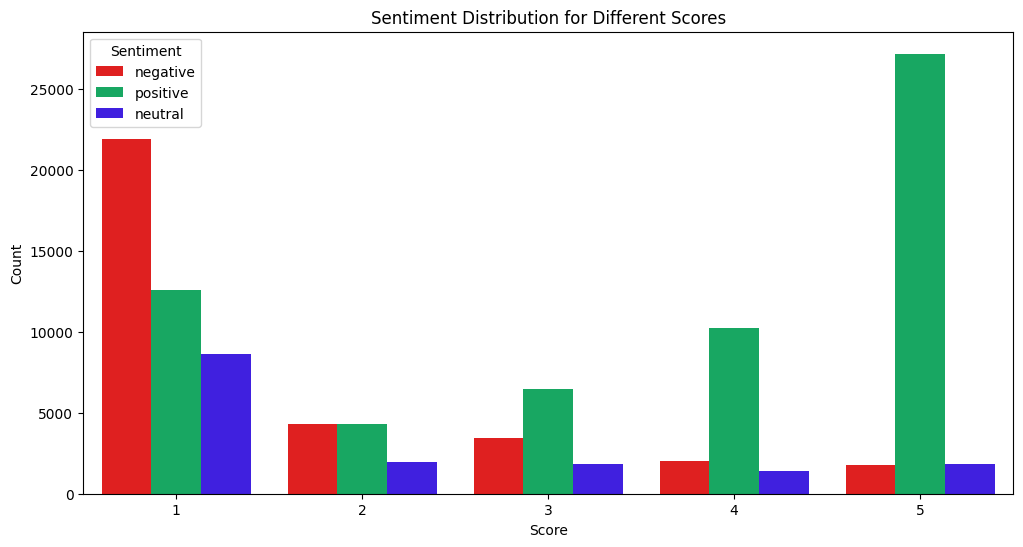

In [ ]:
# Visualizing sentiment distribution for different scores
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='score', hue='sentiment' , palette =('#FF0000', '#00BF63', '#2B00FF'))
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Sentiment Distribution for Different Scores')
plt.legend(title='Sentiment')
plt.show()

## Distribution Data

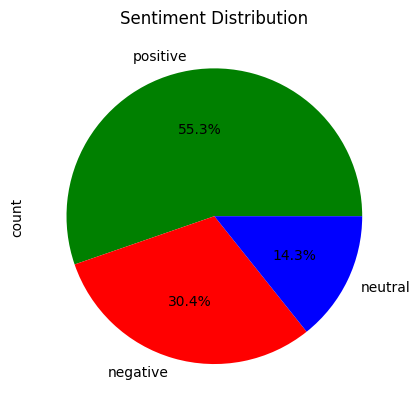

In [ ]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='pie', autopct='%1.1f%%',
                      colors = ['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.show()

## Content Length

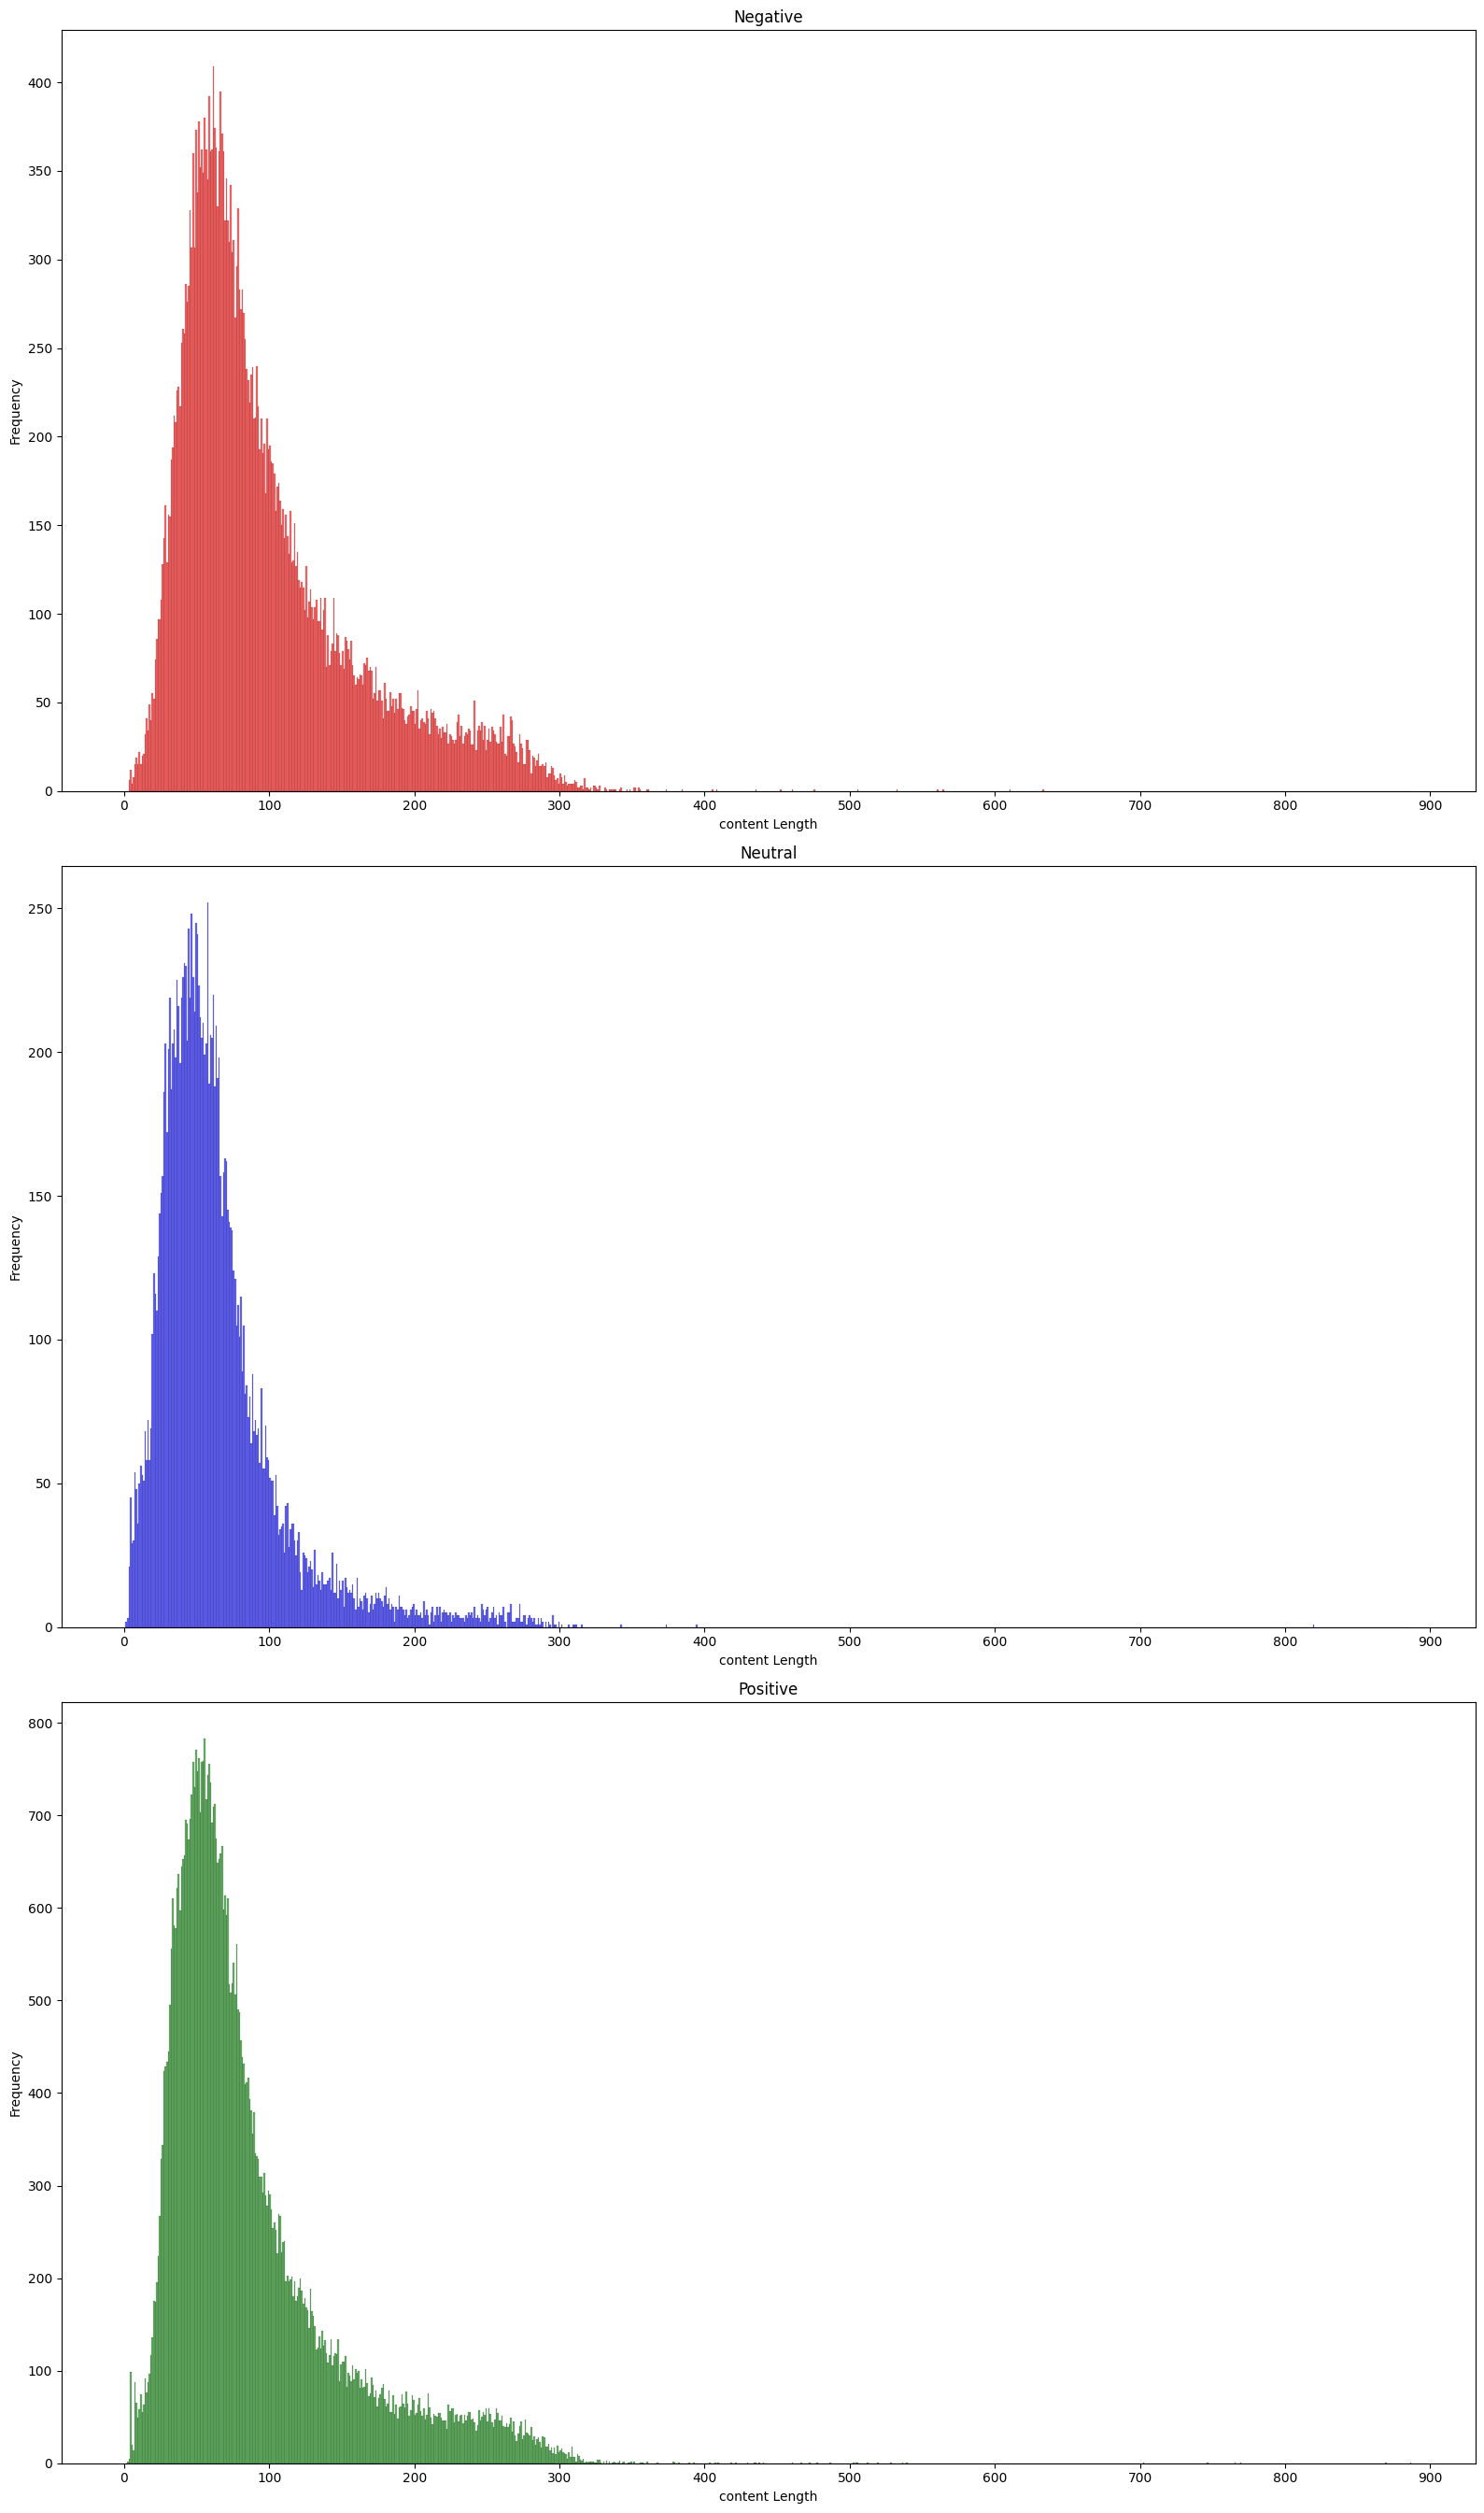

In [ ]:
sentiments = df['sentiment'].unique()
colors = ['red' , 'blue', 'green']
n = len(sentiments)

fig, ax = plt.subplots(n,  figsize=(16, 9*n))

max_content_len = df['clean_content_len'].max()

for i, sentiment in enumerate(sentiments):
    row = i
    content_len = df[df['sentiment']==sentiment]['clean_content_len']
    sns.histplot(content_len, bins=range(1, max_content_len + 1),
                 ax=ax[row], alpha=0.6, color=colors[i])
    ax[row].set_title(sentiment.replace('_', ' ').title())
    ax[row].xaxis.set_major_locator(ticker.MultipleLocator(100))
    ax[row].set_ylabel('Frequency')
    ax[row].set_xlabel('content Length')

plt.tight_layout()
plt.show()

In [ ]:
# Flatten the list of tokens and count the frequency of each token
all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(all_words)

# Menghitung jumlah kata unik
unique_words = set(all_words)
unique_word_count = len(unique_words)

# Menghitung total frekuensi setiap kata muncul
total_freq = sum(word_freq.values())

# Menghitung rata-rata frekuensi kemunculan setiap kata
average_freq = total_freq / unique_word_count

# Menghitung berapa banyak kata unik yang memiliki frekuensi di atas rata-rata
above_average_words = [word for word, freq in word_freq.items() if freq > average_freq]
above_average_count = len(above_average_words)

print("Jumlah kata unik:", unique_word_count)
print("Rata-rata frekuensi kemunculan setiap kata:", average_freq)
print("Jumlah kata unik di atas rata-rata frekuensi:", above_average_count)

Jumlah kata unik: 47898
Rata-rata frekuensi kemunculan setiap kata: 36.56931395882918
Jumlah kata unik di atas rata-rata frekuensi: 2927


## Word Cloud

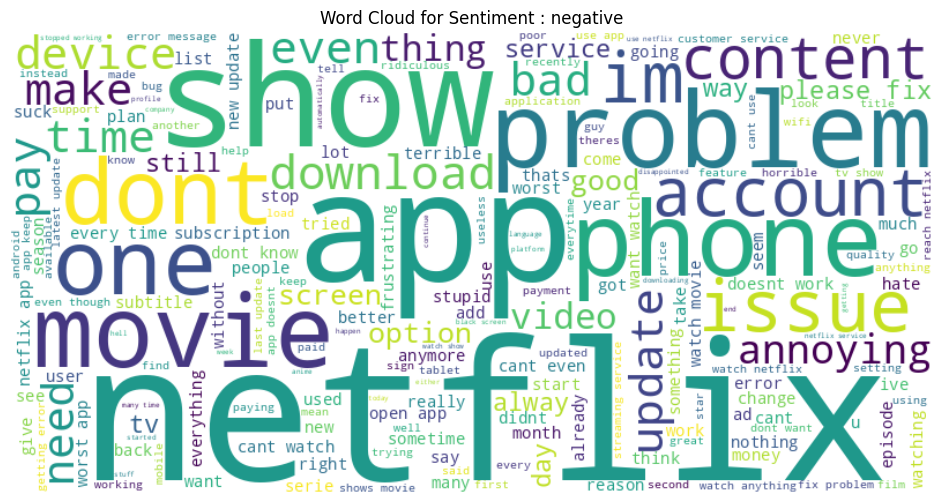

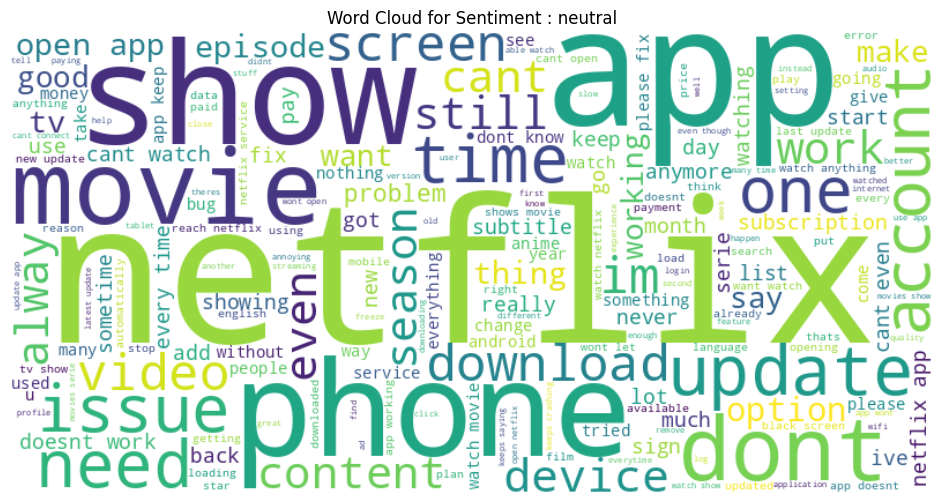

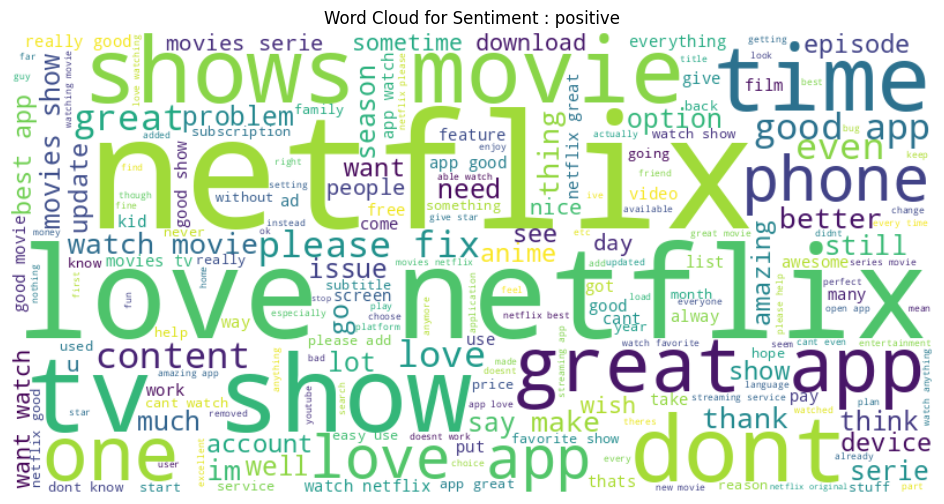

In [ ]:
sentiments = df['sentiment'].unique()
for sentiment in sentiments:
  sentiment_text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_content'])
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
  #Tampilkan Wordcloud
  plt.figure(figsize=(12,6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Word Cloud for Sentiment : {sentiment}')
  plt.show()

## Re-Clean Text

### Custom Stopwords

In [ ]:
# creating a custom list based on domain knowledge
custom_stopwords = ['netflix', 'movie', 'show', 'time', 'app', 'series', 'phone', 'shows', 'movies', 'apps', 'subtitle' , 'watch']
stop_words = list(stop_words ) + custom_stopwords

def remove_stopwords(text):
  text = ' '.join(word for word in text.split(' ') if word not in stop_words)
  return text


### Function Clean Text

In [ ]:
def clean_text(text):
  text = preprocess_text(text)
  text = remove_stopwords(text)
  text = lemmatize_text(text)
  return text

df['cleaned_content'] = df['content'].apply(clean_text)
df.head()

,content,score,sentiment,cleaned_content,lemmatized_review,tokens,clean_content_len
0,Netflix is horrible you have ads now if you're...,1,negative,horrible ad youre watch get like four five ad ...,netflix horrible ad watch show get like four f...,"[netflix, horrible, ads, watching, show, get, ...",252
1,"I used to love Netflix, but now it's ridiculou...",1,negative,use love ridiculous much content english scrol...,use love netflix ridiculous much content engli...,"[used, love, netflix, ridiculous, much, conten...",170
2,Many problems in this software Video not play ...,1,negative,many problem software video play well,many problem software video play well,"[many, problems, software, video, play, well]",33
3,I just star uset,3,neutral,star uset,star uset,"[star, uset]",8
4,Yes I have Netflix on my phone and I have not ...,1,negative,yes even activate there way im go pay rent im ...,yes netflix phone even activate there way im g...,"[yes, netflix, phone, even, activated, theres,...",136


## LDA Model

In [ ]:
# preprocess text data in content

def preprocess_text_data(text):
    tokens = [token for token in text.lower().split() if token.isalnum()] # tokenize text and remove stopwords
    return tokens

# //sentiments = df['sentiment']
# for sentiment in sentiments :
texts = [text for text in df[df['sentiment']=="neutral"]['cleaned_content']]

tokenized_texts = [simple_preprocess(text) for text in texts]
tokenized_texts = [[word for word in doc if word not in stop_words] for doc in tokenized_texts]
tokenized_texts


[['star', 'uset'],
 ['cant', 'use', 'think', 'household', 'new', 'cellphone'],
 ['doesnt', 'picture', 'picture', 'samsung'],
 [],
 ['harry', 'potter'],
 ['didnt', 'let', 'know', 'cost', 'month', 'plus', 'require', 'wifi'],
 ['keep', 'say', 'server', 'work'],
 ['work'],
 ['regular'],
 ['download', 'onto', 'new'],
 ['lag', 'much', 'internet', 'fine'],
 ['day', 'away', 'home', 'account', 'delete'],
 [],
 ['many', 'kind', 'crazy', 'yeah', 'know', 'dont', 'need', 'new'],
 ['work', 'properly', 'samsung', 'sultra'],
 [],
 ['dd', 'dd', 'xx', 'adz', 'sd', 'ißiz'],
 ['add', 'anime', 'mashle', 'magic', 'muscle'],
 ['wait', 'kannada'],
 [],
 ['amaze'],
 ['im', 'unable', 'log', 'keep', 'decline', 'access'],
 ['recharge', 'nahi', 'ho', 'raha', 'hai'],
 ['work'],
 ['open'],
 ['vicky', 'moonlight'],
 ['repot', 'banget', 'sekarang', 'harus', 'pake', 'otp'],
 [],
 ['keep', 'revert', 'galaxy', 'ultra'],
 ['xxv', 'today', 'de', 'come', 'man'],
 ['sex', 'education', 'season', 'pause', 'stream'],
 ['dhoni']

In [ ]:
# create dict and corpus
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_texts]

In [ ]:
#buat lda model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary, num_topics=5,
                                       passes=5, workers=2)

# print topics
topics = lda_model.print_topics(-1)
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")

Topic 0: 0.012*"tv" + 0.011*"use" + 0.010*"video" + 0.010*"fix" + 0.010*"update" + 0.010*"new" + 0.010*"dont" + 0.009*"add" + 0.009*"get" + 0.009*"payment"
Topic 1: 0.029*"cant" + 0.028*"download" + 0.022*"say" + 0.019*"work" + 0.015*"sign" + 0.013*"dont" + 0.013*"even" + 0.013*"keep" + 0.012*"episode" + 0.012*"always"
Topic 2: 0.012*"go" + 0.012*"want" + 0.011*"get" + 0.010*"list" + 0.010*"remove" + 0.009*"hindi" + 0.009*"continue" + 0.009*"option" + 0.009*"audio" + 0.008*"content"
Topic 3: 0.048*"open" + 0.036*"work" + 0.033*"update" + 0.029*"cant" + 0.021*"screen" + 0.021*"try" + 0.020*"keep" + 0.017*"crash" + 0.015*"wont" + 0.015*"even"
Topic 4: 0.022*"account" + 0.020*"use" + 0.015*"need" + 0.013*"even" + 0.013*"get" + 0.011*"cant" + 0.010*"season" + 0.009*"pay" + 0.009*"dont" + 0.008*"want"


In [ ]:
# visualize topics
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

# Model

In [ ]:
max_len = 100  # Max number of words in a sequence
max_features = 5000
# Tokenize the text
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['cleaned_content'])
sequences = tokenizer.texts_to_sequences(df['cleaned_content'])

# Pad the sequences
X = pad_sequences(sequences, maxlen=max_len)

# Convert sentiments to numerical labels
sentiment_label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
y = df['sentiment'].map(sentiment_label_map).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

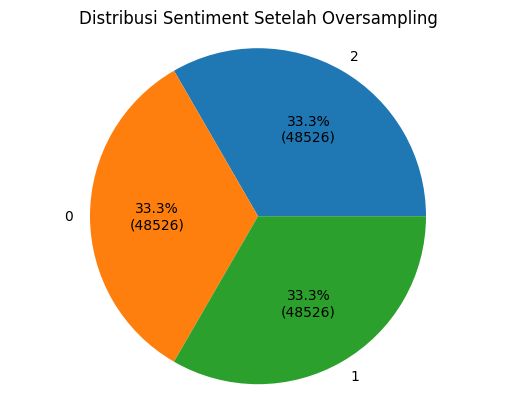

In [ ]:
# Menghitung distribusi kelas setelah resampling
counter = Counter(y_train_resampled)
labels, values = zip(*counter.items())

# Membuat pie chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p,(p/100)*sum(values)))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribusi Sentiment Setelah Oversampling')
plt.show()

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
4550/4550 [==============================] - 1472s 323ms/step - loss: 0.7567 - accuracy: 0.6566 - val_loss: 0.6022 - val_accuracy: 0.7773
Epoch 2/10
4550/4550 [==============================] - 1463s 322ms/step - loss: 0.6239 - accuracy: 0.7239 - val_loss: 0.5181 - val_accuracy: 0.8168
Epoch 3/10
4550/4550 [==============================] - 1461s 321ms/step - loss: 0.5734 - accuracy: 0.7468 - val_loss: 0.5110 - val_accuracy: 0.8092
Epoch 4/10
4550/4550 [==============================] - 1494s 328ms/step - loss: 0.5333 - accuracy: 0.7649 - val_loss: 0.5079 - val_accuracy: 0.8183
Epoch 5/10
4550/4550 [==============================] - 1466s 322ms/step - loss: 0.4993 - accuracy: 0.7799 - val_loss: 0.5354 - val_accuracy: 0.8066
Epoch 6/10
4550/4550 [==============================] - 1476s 324ms/step - loss: 0.4666 - accuracy: 0.7945 - val_loss: 0.5569 - val_accuracy: 0.8131
Epoch 7/10
4550/4550 [==============================] - 1529s 336ms/step - loss: 0.4378 - accuracy: 0.8075

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         640000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 780035 (2.98 MB)
Trainable params: 780035 (2.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Text(0.5, 1.0, 'Loss vs Val-Loss')

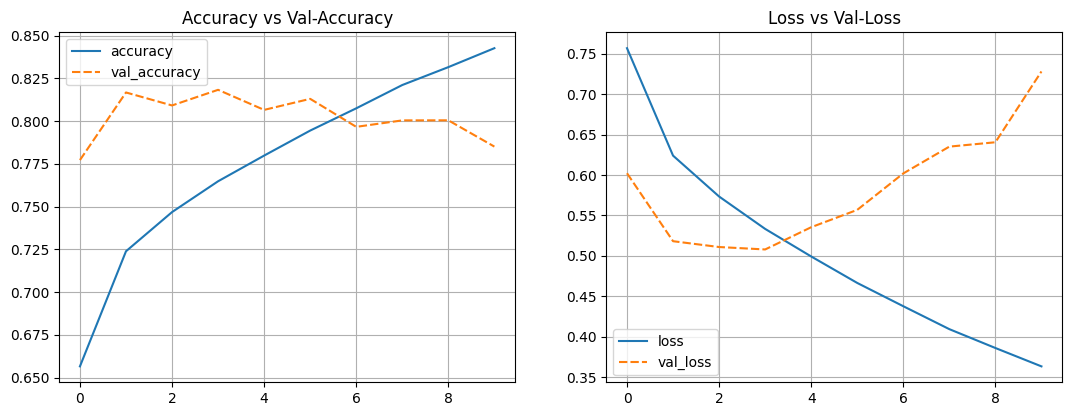

In [ ]:
hist_df = pd.DataFrame(history.history)

plt.figure(figsize=(20, 10))

# Accuracy vs Val-Accuracy
plt.subplot(2, 3, 1)
sns.lineplot(data=hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

# Loss vs Val-Loss
plt.subplot(2, 3, 2)
sns.lineplot(data=hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

687/687 [==============================] - 31s 46ms/step - loss: 0.7279 - accuracy: 0.7851
Test Loss: 0.727939248085022
Test Accuracy: 0.7851292490959167


In [ ]:
# y_pred = model.predict(X_test)
# print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

In [ ]:
model.save('my_model.h5') #Menyimpan Model

# Load Model
from keras.models import load_model
model_load = load_model('my_model.h5')

In [ ]:
import numpy as np

max_len = 30  # Max number of words in a sequence
max_features = 20000
reviews =["i hate netflix"]
#reviews = clean_text(reviews)
sequences = tokenizer.texts_to_sequences(reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_features)
new_review = padded_sequences.reshape(1, -1)
new_review = np.array(padded_sequences)

In [ ]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account (https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/ml-authentication.html)
API_KEY = "FuWY98rfSQaea67H5MxEPO9vsjpU4J-mtmWyU3q3SghP"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"values":new_review.tolist()}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/capstone3/predictions?version=2021-05-01', json=payload_scoring,
 headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())

Scoring response
{'predictions': [{'id': 'dense_1', 'fields': ['prediction', 'prediction_classes', 'probability'], 'values': [[[0.9067952632904053, 0.0810350626707077, 0.01216957252472639], 0, [0.9067952632904053, 0.0810350626707077, 0.01216957252472639]]]}]}


In [ ]:
#Mengambil nilai prediksi
predictions = response_scoring.json()["predictions"][0]["values"][0]
negative_prob = predictions[0]
neutral_prob = predictions[1]
positive_prob = predictions[2]

print('Probabilitas negatif:', negative_prob)
print('Probabilitas netral:', neutral_prob)
print('Probabilitas positif:', positive_prob)

#Menentukan sentimen berdasarkan probabilitas tertinggi
if max(predictions[0]) == positive_prob:
    print("Teks tersebut memiliki sentimen positif.")
elif max(predictions[0]) == neutral_prob:
    print("Teks tersebut memiliki sentimen netral.")
elif max(predictions[0]) == negative_prob:
    print("Teks tersebut memiliki sentimen negatif.")a

Probabilitas negatif: [0.9067952632904053, 0.0810350626707077, 0.01216957252472639]
Probabilitas netral: 0
Probabilitas positif: [0.9067952632904053, 0.0810350626707077, 0.01216957252472639]
